# Anime or Cartoon?

A Deep Learning model that uses CNN to predict if the Image is of Anime or Cartoon.

It is very helpful for Otaku's, Because they dont like Anime being called Cartoon.

## 1- Data Preprcessing

**1.1** Importing important Libraries

In [34]:
import os
import matplotlib.pyplot as plt
import cv2

plotting a image for Example

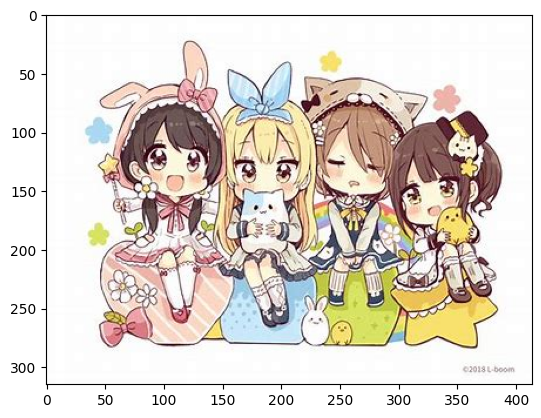

In [35]:
img_ani= cv2.imread(r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Computer Vision\Anime and Cartoon Classifier\Anime or Cartoon\Anime\0.jpeg')
plt.imshow(cv2.cvtColor(img_ani, cv2.COLOR_BGR2RGB))

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

**1.2** Saving *Anime or Cartoon* Folder to `data`

In [37]:
folder_path= r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Computer Vision\Anime and Cartoon Classifier\Anime or Cartoon'
data= keras.utils.image_dataset_from_directory(folder_path,batch_size=16)

Found 362 files belonging to 2 classes.


**1.3** Scaling Images data between 0 and 1 

In [38]:
data= data.map(lambda x,y: (x/255,y))

**1.4** Making Batches of `data`

In [39]:
data_iterator= data.as_numpy_iterator()

In [40]:
batch= data_iterator.next()

In [41]:
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

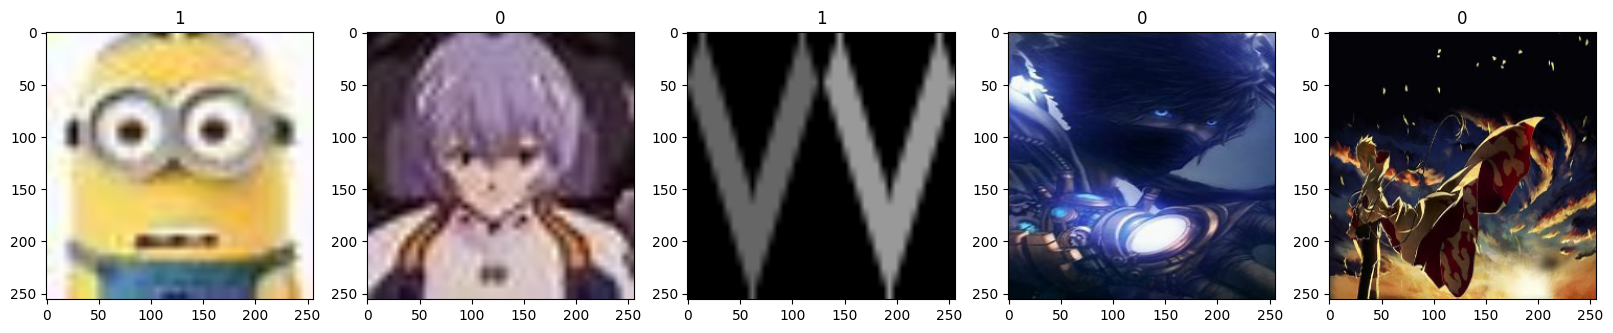

In [42]:
fig, ax= plt.subplots(ncols=5, figsize= (20,20))
for idx, img in enumerate (batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2- Making Model

**2.1** Splitting the `data`

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train= data.take(train_size)
val= data.take(val_size)
test= data.take(test_size)

**2.2** Making CNN

In [45]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [46]:
model= Sequential([
    Conv2D(32, kernel_size=(3,3),strides=2, activation= 'relu', input_shape= (256,256,3)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(32, kernel_size=(3,3),strides=2, activation= 'relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(1, activation= 'sigmoid')
])

**2.3** Compiling the Model

In [47]:
model.compile(optimizer='adam', metrics=['accuracy'], loss= 'binary_crossentropy')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0

**2.4** Defining Callbacks

In [49]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

**2.5** Fitting the `model` on `train` 

In [50]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 10s 405ms/step - loss: 0.9193 - accuracy: 0.6406 - val_loss: 0.6829 - val_accuracy: 0.6875
Epoch 2/20
16/16 [==============================] - 9s 557ms/step - loss: 0.6312 - accuracy: 0.7461 - val_loss: 0.6307 - val_accuracy: 0.7031
Epoch 3/20
16/16 [==============================] - 6s 345ms/step - loss: 0.5823 - accuracy: 0.7461 - val_loss: 0.5777 - val_accuracy: 0.8125
Epoch 4/20
16/16 [==============================] - 7s 411ms/step - loss: 0.5469 - accuracy: 0.7422 - val_loss: 0.5635 - val_accuracy: 0.7656
Epoch 5/20
16/16 [==============================] - 7s 448ms/step - loss: 0.5153 - accuracy: 0.7188 - val_loss: 0.4854 - val_accuracy: 0.7812
Epoch 6/20
16/16 [==============================] - 8s 480ms/step - loss: 0.4332 - accuracy: 0.7539 - val_loss: 0.4609 - val_accuracy: 0.7656
Epoch 7/20
16/16 [==============================] - 7s 411ms/step - loss: 0.4816 - accuracy: 0.7422 - val_loss: 0.4216 - val_accuracy: 0.7656
Epoch

## 3- Plotting 

**3.1** Plotting `loss`

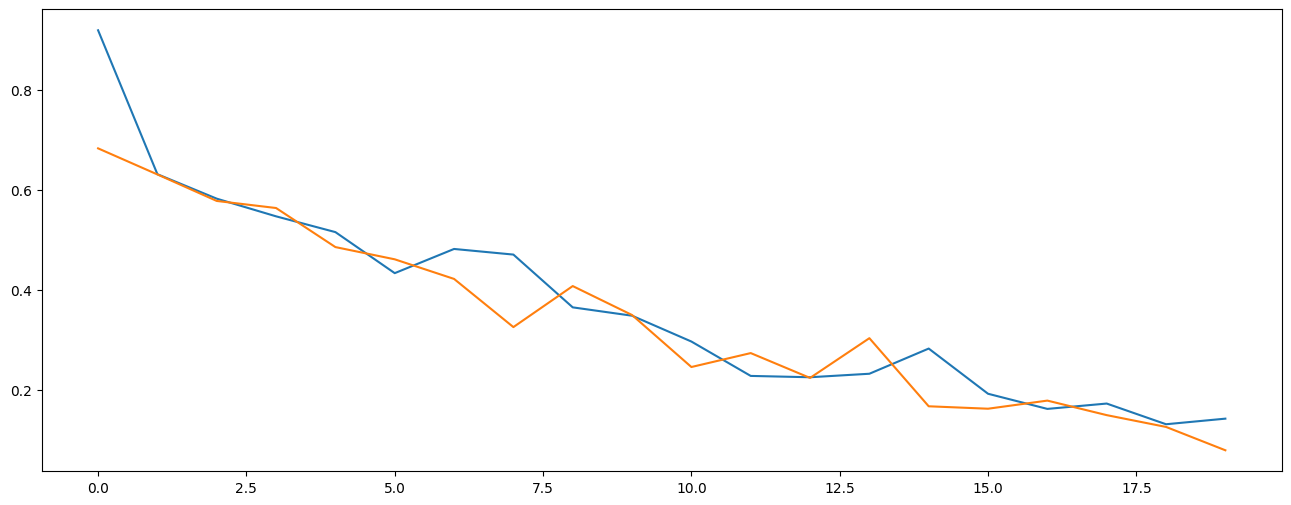

In [51]:
fig= plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

**3.2** Plotting `Accuracy`

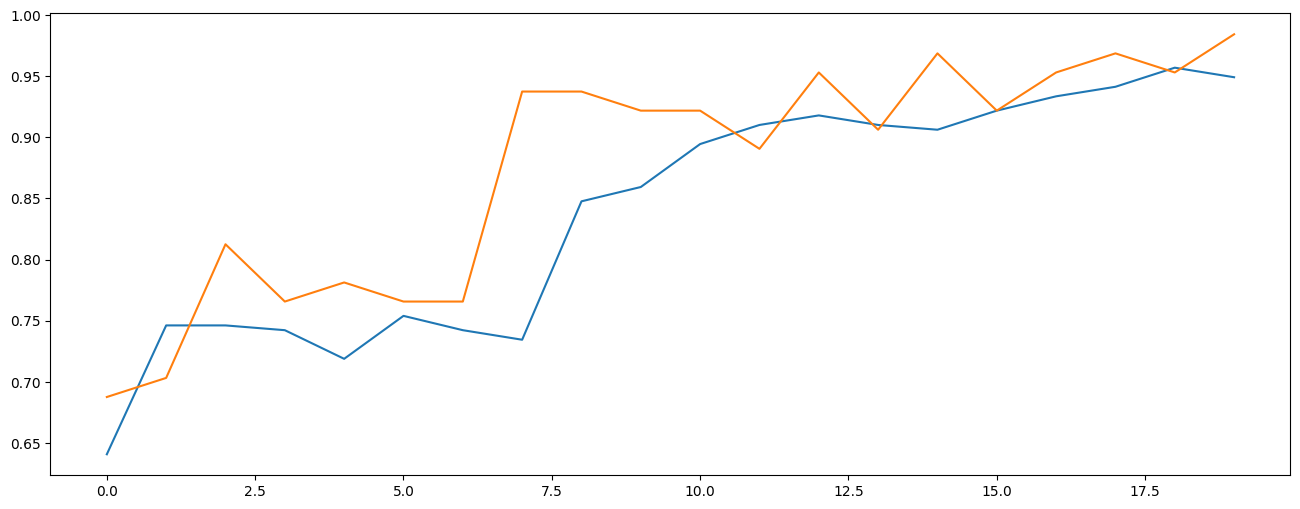

In [52]:
fig= plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## 4- Testing

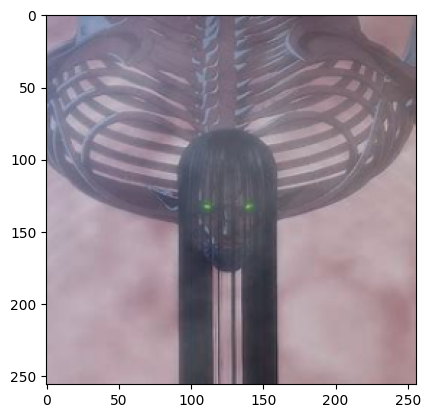

In [87]:
test_img= cv2.imread(r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Computer Vision\Anime and Cartoon Classifier\Test-Anime.jpeg')
# test_img= cv2.imread(r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Computer Vision\Anime and Cartoon Classifier\Test-Cartoon.jpeg')
resize = tf.image.resize(test_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [89]:
yhat

array([[0.30464983]], dtype=float32)

In [90]:
if yhat > 0.5: 
    print(f'Predicted class is Cartoon')
    result= "Cartoon"
else:
    print(f'Predicted class is Anime')
    result= 'Anime'


Predicted class is Anime


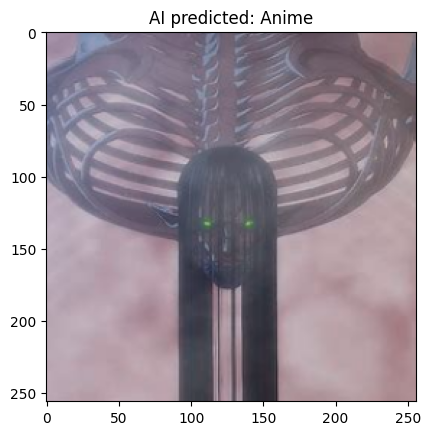

In [91]:
plt.imshow(resize.numpy().astype(int))
plt.title(f"AI predicted: {result}")
plt.show()

## 5- Saving the Model

In [60]:
save_path= r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Computer Vision\Anime and Cartoon Classifier\Model Save\AnimeCartoonClassifier.h5'
model.save(save_path)